# Data Classification

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Preprocessing

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df = df.drop("Cabin", axis = 1)

In [5]:
df["Age"] = df["Age"].fillna( df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [6]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

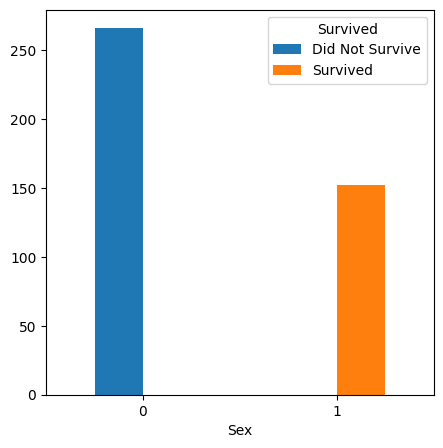

In [8]:
sex_survived_grouped = df.groupby(["Sex","Survived"]).size().unstack()
sex_survived_grouped.plot( kind = "bar", figsize = [5,5])
plt.xticks(rotation=0)
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"], loc="upper right")
plt.show()

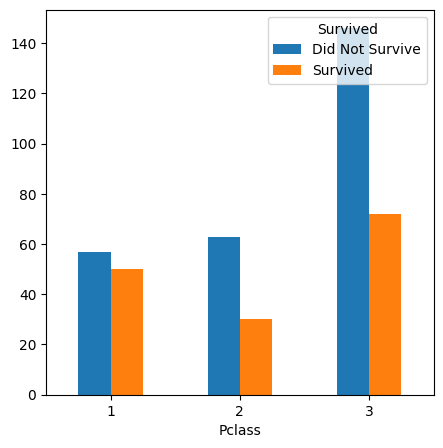

In [9]:
pclass_survived_grouped = df.groupby(["Pclass", "Survived"]).size().unstack()
pclass_survived_grouped.plot( kind = "bar", figsize=(5,5))
plt.xticks(rotation = 0)
plt.legend(title = "Survived", labels = ["Did Not Survive" , "Survived"], loc = "upper right")
plt.show()

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [11]:
normalization_fields = ["Age","Fare"] 
df[normalization_fields] = (df[normalization_fields] - df[normalization_fields].mean())/ df[normalization_fields].std()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,0.334592,0,0,330911,-0.497811,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.323944,1,0,363272,-0.512660,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,2.511166,0,0,240276,-0.464532,2
3,895,0,3,"Wirz, Mr. Albert",0,-0.259019,0,0,315154,-0.482888,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.654760,1,1,3101298,-0.417971,0


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000,418.000000,4.180000e+02,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,3.824692e-17,0.447368,0.392344,-2.337312e-17,0.464115
std,120.810458,0.481622,0.841838,0.481622,1.000000e+00,0.896760,0.981429,1.000000e+00,0.685516
min,892.000000,0.000000,1.000000,0.000000,-2.382564e+00,0.000000,0.000000,-6.380170e-01,0.000000
25%,996.250000,0.000000,1.000000,0.000000,-5.756121e-01,0.000000,0.000000,-4.966178e-01,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.791690e-01,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,4.335268e-01,1.000000,0.000000,-7.391031e-02,1.000000
max,1309.000000,1.000000,3.000000,1.000000,3.619240e+00,8.000000,9.000000,8.536851e+00,2.000000


In [13]:
x = df[["Pclass","Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)
print("Whole:" , x.shape)
print("Train:" , x_train.shape , y_train.shape)
print("Test:",x_test.shape , y_test.shape )
x_train, y_train

Whole: (418, 7)
Train: (334, 7) (334,)
Test: (84, 7) (84,)


(     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
 280       3    1 -0.575612      0      0 -0.482888         0
 284       3    1 -2.237723      1      1 -0.276049         0
 40        3    0  0.690758      0      1 -0.397749         1
 17        3    0 -0.733908      0      0 -0.508631         1
 362       2    1  0.057573      0      0 -0.261946         0
 ..      ...  ...       ...    ...    ...       ...       ...
 299       3    0 -0.100723      0      0 -0.497363         0
 22        1    1  0.000000      0      0 -0.070628         0
 72        3    1 -0.100723      0      0 -0.496095         0
 15        2    1 -0.496464      1      0 -0.141589         1
 168       1    1  0.000000      0      0 -0.141589         1
 
 [334 rows x 7 columns],
 280    1
 284    1
 40     0
 17     0
 362    1
       ..
 299    0
 22     1
 72     1
 15     1
 168    1
 Name: Survived, Length: 334, dtype: int64)

In [11]:
def find_best_model( x_train, y_train, x_test, y_test, param_grid, model, scoring = "accuracy", cv = 5 ):
    grid_search = GridSearchCV(estimator = model, param_grid= param_grid, scoring = scoring, cv = cv)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred) 
    return acc_score, best_model

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
param_grid = { "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky"], "C" : [0.001, 0.005,0.01,0.05] }
acc_score, best_random_forest = find_best_model( x_train, y_train, x_test, y_test, param_grid , logistic_regression)
print( f"Accuracy of best performing Support Vector Machine Classifier is {acc_score}" )

Accuracy of best performing Support Vector Machine Classifier is 1.0


/home/shriyam/Crux-Inductions/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.svm import SVC

svmClassifierRBF = SVC(kernel = "rbf").fit(x_train,y_train)
svmClassifierSIGMOID = SVC(kernel = "sigmoid").fit(x_train,y_train)
svmClassifierLINEAR = SVC(kernel = "linear").fit(x_train,y_train)
svmClassifierPOLYNOMIAL = SVC(kernel = "poly").fit(x_train,y_train)

print("Accuracy of RBF: ", accuracy_score(svmClassifierRBF.predict(x_test) , y_test))
print("Accuracy of Sigmoid: ", accuracy_score(svmClassifierSIGMOID.predict(x_test) , y_test))
print("Accuracy of linear: ", accuracy_score(svmClassifierLINEAR.predict(x_test) , y_test))
print("Accuracy of polynomial: ", accuracy_score(svmClassifierPOLYNOMIAL.predict(x_test) , y_test))



Accuracy of RBF:  0.6309523809523809
Accuracy of Sigmoid:  0.5476190476190477
Accuracy of linear:  1.0
Accuracy of polynomial:  0.6666666666666666


In [14]:
svm = SVC()
param_grid = { "kernel" : ["rbf", "sigmoid", "linear", "poly"], "degree" : [1,2,3,4,5], "C" : [0.001,0.01, 0.05, 0.1, 0.5] }
acc_score, best_random_forest = find_best_model( x_train, y_train, x_test, y_test, param_grid , svm)
print( f"Accuracy of best performing Support Vector Machine Classifier is {acc_score}" )

Accuracy of best performing Support Vector Machine Classifier is 1.0


In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "entropy")
param_grid = { "criterion" : ["gini", "entropy", "log_loss"], "max_depth" : [1,2,3,4,5] }
acc_score, best_random_forest = find_best_model( x_train, y_train, x_test, y_test, param_grid , decision_tree)
print( f"Accuracy of best performing Decision Tree Classifier is {acc_score}" )

Accuracy of best performing Decision Tree Classifier is 1.0


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

linear_discriminant_analysis = LinearDiscriminantAnalysis()
param_grid = { "solver" : [ "svd","lsqr", "eigen" ] }
acc_score, best_random_forest = find_best_model( x_train, y_train, x_test, y_test, param_grid , linear_discriminant_analysis)
print( f"Accuracy of best performing Linear Discriminant Analysis Classifier is {acc_score}" )

Accuracy of best performing Linear Discriminant Analysis Classifier is 0.6309523809523809


/home/shriyam/Crux-Inductions/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shriyam/Crux-Inductions/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shriyam/Crux-Inductions/env/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/shriyam/Crux-Inductions/env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
param_grid = { "n_estimators" : [50,100,200,300,500,1000], "max_depth" : [1,2,3,4,5], "criterion" : ["gini", "entropy", "log_loss"] }
acc_score, best_random_forest = find_best_model( x_train, y_train, x_test, y_test, param_grid , random_forest)
print( f"Accuracy of best performing Random Forest Classifier is {acc_score}" )

Accuracy of best performing Random Forest Classifier is 1.0


In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = { "n_estimators" : [50,100,200,300,500,1000], "max_depth" : [1,2,3,4,5], "learning_rate" : [0.01, 0.1, 0.2, 0.05, 0.5] }
acc_score, best_xgb = find_best_model(x_train, y_train, x_test, y_test, param_grid , xgb)
print(f"Accuracy of best XGBoost model: {acc_score}")

Accuracy of best XGBoost model: 1.0


## Linear Regression Mode

### Cost Function

In [14]:
def calculate_y_hat( x , theta):
    z = x.dot(theta)
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [15]:
def cost(x , y, theta):
    y_hat = calculate_y_hat( x, theta)
    m = len( x )
    J = (1/(m)) * ( -y.T.dot( np.log(y_hat) ) - (1-y).T.dot(np.log(1-y_hat)) )
    return J

In [16]:
def gradient_descent( x , y , theta, alpha, num_cycles ):
    m = len(x)
    J_values = np.ones( shape = (num_cycles, 1) )

    for i in range(0 , num_cycles):
        y_hat = calculate_y_hat(x,theta)
        dJ = (1/m) * ( (y_hat-y).T.dot(x))
        theta = theta - ( alpha * (dJ.T) )
        J_values[i] = cost(x,y,theta)
    return theta, J_values

In [17]:
x_train = np.hstack( (np.ones ( ( len(x_train) ,1 )  ), x_train) )
x_test  = np.hstack( (np.ones ( ( len(x_test ) ,1 )  ), x_test ) )

y_train = np.array(y_train.values).reshape(-1,1)
y_test  = np.array(y_test .values).reshape(-1,1)

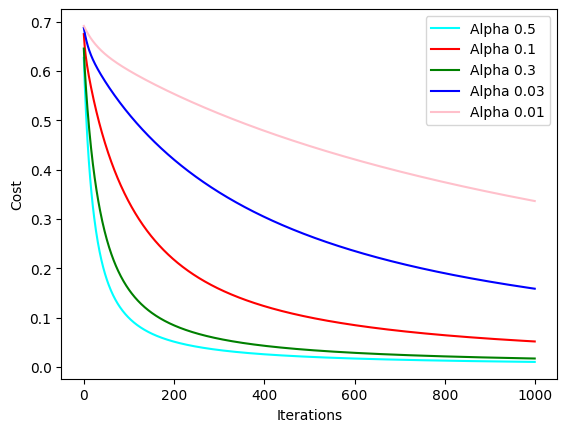

In [24]:
alpha = [ 0.5,0.1, 0.3, 0.03, 0.01]
colors = [ 'cyan', 'red','green','blue','pink','black', 'violet']
num_cycles = 1000

for i in range(0,len(alpha)):
    theta = np.zeros(shape = (x_train.shape[1] , 1) )
    theta, J_values = gradient_descent( x_train, y_train, theta, alpha[i], num_cycles)
    plt.plot( range( len(J_values) ), J_values, colors[i], label=f'Alpha { alpha[i] }' ) 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [25]:
num_cycles = 1000
alpha = 0.5
theta = np.zeros(shape = (x_train.shape[1] , 1) )
theta, J_values = gradient_descent(x_train, y_train, theta, alpha, num_cycles)

In [36]:
y_hat = calculate_y_hat(x_test, theta)
y_pred = y_hat > 0.5
y_pred = y_pred.astype(int)
acc_score = accuracy_score( y_test, y_pred )
print(f"Accuracy of the self-made Logistic Regression Model is: {acc_score}")

Accuracy of the self-made Logistic Regression Model is: 1.0
